# LAB3

Name: AKSHAY KEKUDA

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (
    OneHotEncoder, LabelEncoder, Binarizer, KBinsDiscretizer,
    MaxAbsScaler, StandardScaler, MinMaxScaler
)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

The data set does not have any missing values.

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

The data types of the data set are as expected

In [8]:
df['User ID'].is_unique

True

Since the USER ID column has retured True for is_unique check, we can say that there are no duplicate data.

Let us now analyze the Gender attribute

In [9]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [10]:
df['Gender'].describe()

count        400
unique         2
top       Female
freq         204
Name: Gender, dtype: object

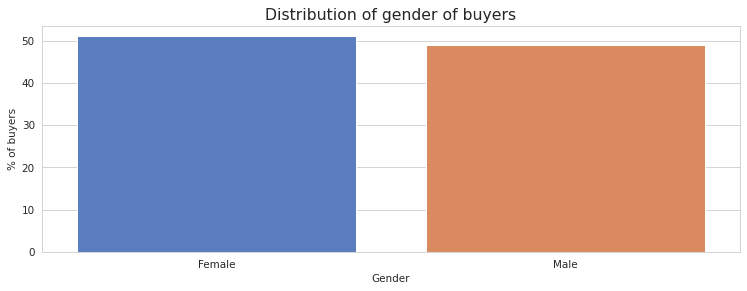

In [11]:
data = df.Gender.value_counts(normalize = 'True') * 100
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,4), dpi=75)
ax1 = fig.add_subplot(111)
sns.barplot(x=data.keys(), y=data, ci=None, palette="muted",orient='v', ax=ax1)
ax1.set_title("Distribution of gender of buyers", fontsize=15)
ax1.set_xlabel ("Gender")
ax1.set_ylabel ("% of buyers")
plt.show()

The gender atttribute has no missing/abnormal data. The percentage of female buyers is slightly higher than that of male buyers.

Let us now look at the Age of the buyers

In [12]:
df.Age.describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

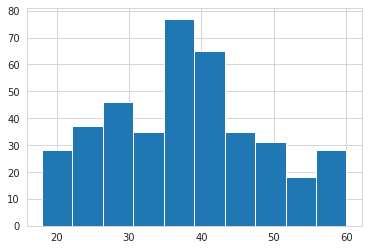

In [13]:
df.Age.hist()
plt.show()

In [14]:
print("Max buyers are of age {} years".format(df.Age.mode()[0]))
print("Median age of buyers is {} years".format(int(df.Age.median())))

Max buyers are of age 35 years
Median age of buyers is 37 years


Let us look at the salary attribute of the buyers.

In [15]:
df.EstimatedSalary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

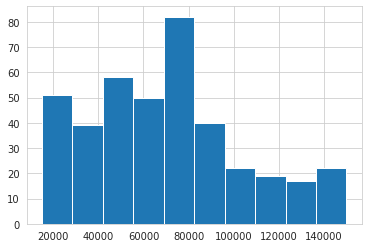

In [16]:
df.EstimatedSalary.hist()

In [17]:
print("Max buyers have a salary of ${}".format(df.EstimatedSalary.mode()[0]))
print("Median salary of buyers is ${}".format(int(df.EstimatedSalary.median())))

Max buyers have a salary of $72000
Median salary of buyers is $70000


Let us look at the class Purchased

In [18]:
df.Purchased.value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

Since the data doesn't describe what 1 and 0 stands for , I assume 1 signifies pruchase of a product and 0 signifies not purchases. At the outset from the given data it looks like 64% of the buyers did not buy the product. It can be due to a variety of reason, like the product may be not affordable to many of the people from the data set or it may cater to an age group that is not centered around the mode/median age of the buyers. 

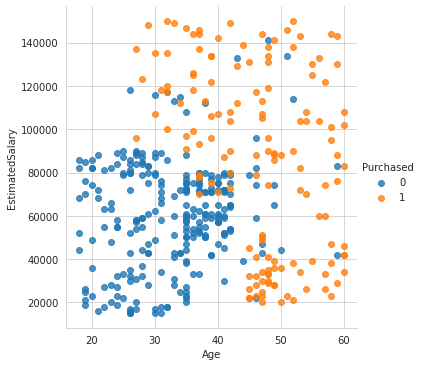

In [19]:
sns.lmplot(data=df, x="Age", y="EstimatedSalary", fit_reg=False, hue="Purchased")
plt.show()

As can be seen from the above graph, we see that people below age 40 years and having a salary less that 80000 have not purchased the the product.

<Figure size 1050x1050 with 0 Axes>

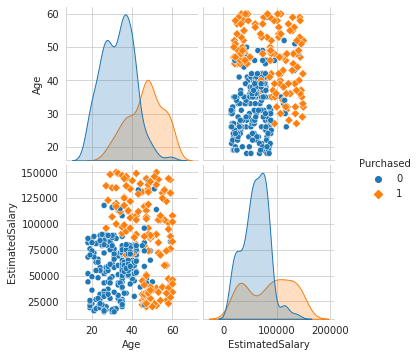

In [20]:
fig = plt.figure(figsize=(14,14), dpi=75)
sns.pairplot(df[df.columns[1:]], kind="scatter", markers=["o", "D"], hue="Purchased")

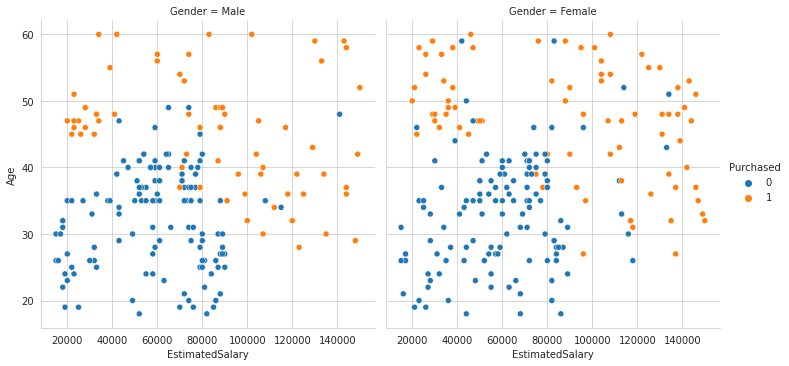

In [21]:
sns.relplot(x="EstimatedSalary", y="Age", hue="Purchased", col="Gender", data=df);

The above plot illustrates the point that the the distribution of males and females who have not purchased the product is similar i.e people belonging to both the genders with a salary of less than 80k and age less than 40 have not purchased the product

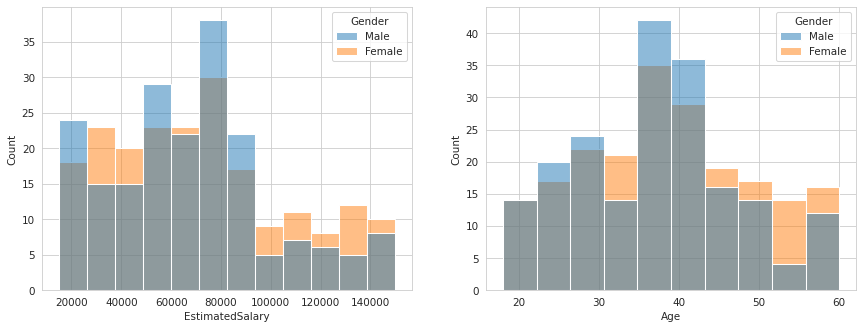

In [22]:
fig = plt.figure(figsize=(14,5), dpi=75)
plt.subplot(121)
sns.histplot(df, x = 'EstimatedSalary', hue = 'Gender')
plt.subplot(122)
sns.histplot(df, x = 'Age', hue = 'Gender')
plt.show()

The above graph shows that in the data set the more number of males have salaries around the median salary. Surprisingly number of females receiving high salaries(>100k) are more than males. 

Before we proceeed we can encode Male and Female gender as 1 and 0 respectively.

In [23]:
for index, rows in df.iterrows():
  df.at[index, 'Gender'] = 1 if df.iloc[index]['Gender'] == 'Male' else 0

In [24]:
df.Gender.value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [25]:
df['Gender'] = df['Gender'].astype(int)
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

We have now converted the Gender data type to type int

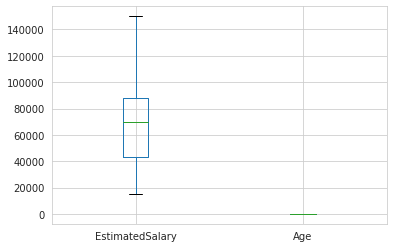

In [26]:
df.boxplot(column = ["EstimatedSalary", "Age"])
plt.show()

As age and estimated salary are in a different scale, we will normalize these columns


In [27]:
scaled_df = df.copy(deep=True)
num_cols = scaled_df.columns[2:4]
min, max = 0, 1 # new scale
for c in num_cols:
    X = scaled_df[c]
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    scaled_df[c] = X_scaled

In [28]:
scaled_df.dtypes

User ID              int64
Gender               int64
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

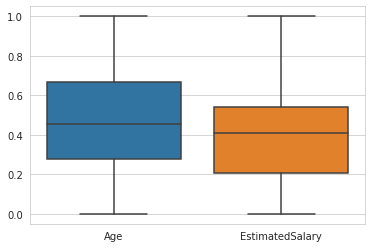

In [29]:
sns.boxplot(data=scaled_df[num_cols])
plt.show()

From the above graph, we can see that the data has no outliers. 

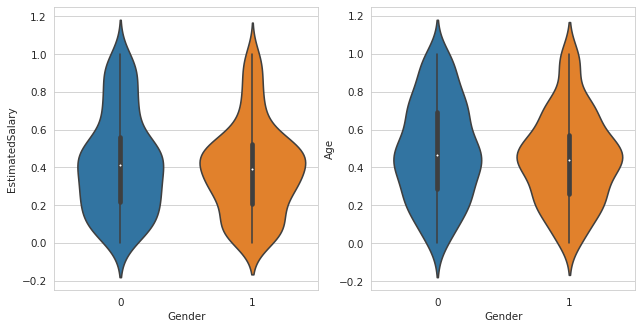

In [30]:
fig = plt.figure(figsize=(10,5), dpi=75)
plt.subplot(121)
sns.violinplot(x=scaled_df['Gender'], y=scaled_df['EstimatedSalary'])
plt.subplot(122)
sns.violinplot(x=scaled_df['Gender'], y=scaled_df['Age'])
plt.show()

The above vioilin plot emphasizes on the point that distribution of males and females are not totally similar. There are more males( represented by 0) around the median salary and age.

In [31]:
scaled_df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,0.467976,0.405500,0.357500
std,7.165832e+04,0.500526,0.249592,0.252570,0.479864
min,1.556669e+07,0.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,0.000000,0.279762,0.207407,0.000000
50%,1.569434e+07,0.000000,0.452381,0.407407,0.000000
75%,1.575036e+07,1.000000,0.666667,0.540741,1.000000
max,1.581524e+07,1.000000,1.000000,1.000000,1.000000


In [32]:
scaled_df.dtypes

User ID              int64
Gender               int64
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [33]:
scaled_df[scaled_df.columns[1:]].corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


Age and Estimated Salary have very less correlation. 

##Data Dictionary of preprocessed data

|#|Attribute|Data Type|Range|Attribute Type|Description|
|-:|:-|:-|:-|:-|:-|
|1|User Id|int64|[1556669,1581542]| integer| User ID of the buyer. This data is not of much importance for preprocessing
|2|Gender|int64|0 or 1|categorical| 1 indicates Male category and 0 indicates female category
|3|EstimatedSalary|float64|[0,1]|floating|Gives the estimated salary of the buyers. This data has been scaled to (0,1)
|4|Age|float64|[0,1]| floating| Gives the age of the buyer. This data has been scaled to (0,1)
|5|Purchased|int64|0 or 1| categorical| 0 signifies that the buyer has not purchased the product and 1 signifies that the buyer has purchased


Note: We can convert estimated salary and age to categorical data for visualization purposes.
Also we will not be using User Id attibute for further analysis

We will now start with building the classifiers

In [34]:
X = scaled_df[['Age', 'EstimatedSalary', 'Gender']]
y = scaled_df['Purchased']


In [35]:
X_train.shape

(268, 3)

In [176]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
for epoch in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  knn.fit(X_train, y_train) # fit training data
  y_hat_tr = knn.predict(X_train)
  err_tr = 1 - accuracy_score(y_train, y_hat_tr)
  y_hat_te = knn.predict(X_test)
  err_te = 1 - accuracy_score(y_test, y_hat_te)
  print("KNN Training error: {:.2f} Test Error: {:.2f}".format(err_tr, err_te))

KNN Training error: 0.08 Test Error: 0.11
KNN Training error: 0.08 Test Error: 0.12
KNN Training error: 0.07 Test Error: 0.09
KNN Training error: 0.08 Test Error: 0.09
KNN Training error: 0.09 Test Error: 0.08
KNN Training error: 0.08 Test Error: 0.08
KNN Training error: 0.08 Test Error: 0.09
KNN Training error: 0.09 Test Error: 0.05
KNN Training error: 0.07 Test Error: 0.11
KNN Training error: 0.07 Test Error: 0.13


In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

for epoch in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  lr.fit(X_train, y_train)
  y_hat_tr = lr.predict(X_train)
  err_tr = 1 - accuracy_score(y_train, y_hat_tr)
  y_hat_te = lr.predict(X_test)
  err_te = 1 - accuracy_score(y_test, y_hat_te)
  print(" Logistic Regression Training error: {:.2f} Test Error: {:.2f}".format(err_tr, err_te))

 Logistic Regression Training error: 0.17 Test Error: 0.20
 Logistic Regression Training error: 0.15 Test Error: 0.21
 Logistic Regression Training error: 0.18 Test Error: 0.17
 Logistic Regression Training error: 0.19 Test Error: 0.15
 Logistic Regression Training error: 0.18 Test Error: 0.19
 Logistic Regression Training error: 0.18 Test Error: 0.23
 Logistic Regression Training error: 0.18 Test Error: 0.17
 Logistic Regression Training error: 0.18 Test Error: 0.17
 Logistic Regression Training error: 0.19 Test Error: 0.20
 Logistic Regression Training error: 0.19 Test Error: 0.14


In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
for epoch in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  dtc.fit(X_train, y_train)
  y_hat_tr = dtc.predict(X_train)
  err_tr = 1 - accuracy_score(y_train, y_hat_tr)
  y_hat_te = dtc.predict(X_test)
  err_te = 1 - accuracy_score(y_test, y_hat_te)
  print("Decision Tree Classifier Training error: {:.2f} Test Error: {:.2f}".format(err_tr, err_te))

Decision Tree Classifier Training error: 0.00 Test Error: 0.17
Decision Tree Classifier Training error: 0.00 Test Error: 0.15
Decision Tree Classifier Training error: 0.00 Test Error: 0.14
Decision Tree Classifier Training error: 0.00 Test Error: 0.11
Decision Tree Classifier Training error: 0.00 Test Error: 0.19
Decision Tree Classifier Training error: 0.00 Test Error: 0.17
Decision Tree Classifier Training error: 0.00 Test Error: 0.14
Decision Tree Classifier Training error: 0.00 Test Error: 0.21
Decision Tree Classifier Training error: 0.00 Test Error: 0.16
Decision Tree Classifier Training error: 0.00 Test Error: 0.14


In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
for epoch in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  nb.fit(X_train, y_train)
  y_hat_tr = nb.predict(X_train)
  err_tr = 1 - accuracy_score(y_train, y_hat_tr)
  y_hat_te = nb.predict(X_test)
  err_te = 1 - accuracy_score(y_test, y_hat_te)
  print("Gaussain Naive Bayes Training error: {:.2f} Test Error: {:.2f}".format(err_tr, err_te))

Gaussain Naive Bayes Training error: 0.12 Test Error: 0.09
Gaussain Naive Bayes Training error: 0.10 Test Error: 0.11
Gaussain Naive Bayes Training error: 0.13 Test Error: 0.08
Gaussain Naive Bayes Training error: 0.11 Test Error: 0.09
Gaussain Naive Bayes Training error: 0.10 Test Error: 0.11
Gaussain Naive Bayes Training error: 0.11 Test Error: 0.12
Gaussain Naive Bayes Training error: 0.11 Test Error: 0.10
Gaussain Naive Bayes Training error: 0.12 Test Error: 0.07
Gaussain Naive Bayes Training error: 0.10 Test Error: 0.11
Gaussain Naive Bayes Training error: 0.12 Test Error: 0.12


In [90]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
for epoch in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  svc.fit(X_train, y_train)
  y_hat_tr = svc.predict(X_train)
  err_tr = 1 - accuracy_score(y_train, y_hat_tr)
  y_hat_te = svc.predict(X_test)
  err_te = 1 - accuracy_score(y_test, y_hat_te)
  print("Support Vector Classifier Training error: {:.2f} Test Error: {:.2f}".format(err_tr, err_te))

Support Vector Classifier Training error: 0.17 Test Error: 0.13
Support Vector Classifier Training error: 0.16 Test Error: 0.14
Support Vector Classifier Training error: 0.13 Test Error: 0.17
Support Vector Classifier Training error: 0.16 Test Error: 0.14
Support Vector Classifier Training error: 0.15 Test Error: 0.17
Support Vector Classifier Training error: 0.15 Test Error: 0.18
Support Vector Classifier Training error: 0.13 Test Error: 0.20
Support Vector Classifier Training error: 0.18 Test Error: 0.17
Support Vector Classifier Training error: 0.17 Test Error: 0.17
Support Vector Classifier Training error: 0.16 Test Error: 0.14


In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
for epoch in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  rfc.fit(X_train, y_train)
  y_hat_tr = rfc.predict(X_train)
  err_tr = 1 - accuracy_score(y_train, y_hat_tr)
  y_hat_te = rfc.predict(X_test)
  err_te = 1 - accuracy_score(y_test, y_hat_te)
  print("Random Forest Classifier Training error: {:.2f} Test Error: {:.2f}".format(err_tr, err_te))

Random Forest Classifier Training error: 0.00 Test Error: 0.10
Random Forest Classifier Training error: 0.00 Test Error: 0.09
Random Forest Classifier Training error: 0.00 Test Error: 0.08
Random Forest Classifier Training error: 0.00 Test Error: 0.13
Random Forest Classifier Training error: 0.00 Test Error: 0.10
Random Forest Classifier Training error: 0.00 Test Error: 0.12
Random Forest Classifier Training error: 0.00 Test Error: 0.10
Random Forest Classifier Training error: 0.00 Test Error: 0.12
Random Forest Classifier Training error: 0.00 Test Error: 0.08
Random Forest Classifier Training error: 0.00 Test Error: 0.13


Summarizing the above results, we have the following observations for one run:
<br></br>

|#|Classifier Type|Training Error|Test Error|
|-:|:-|:-|:-|
|1|LogisticRegression|0.19|0.16|
|2|KNeighborsClassifier|0.08|0.08|
|3|DecisionTreeClassifier|0.0|0.12|
|4|GaussianNB|0.11|0.09|
|5|LinearSVC|0.17|0.12|
|6|RandomForestClassifier|0.00|0.08|

As can be seen from the above table, random forest classifier gives the least train and test error rates. This will change on running the above block of codes multiple times. Decsison Tree classifier does well on training data but not on test data

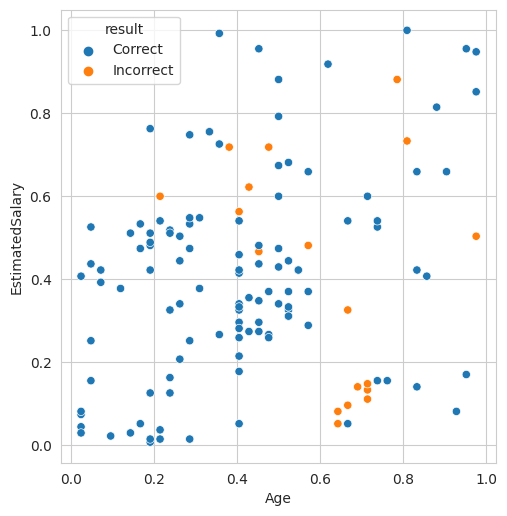

In [91]:
X_test2 = X_test.copy()
X_test2['result'] = ['Correct' if x else 'Incorrect' for x in (y_hat_te == y_test)]

import seaborn as sns
fig, ax1 = plt.subplots(figsize=(6,6), dpi=100)
sns.scatterplot(data=X_test2, x="Age", y="EstimatedSalary", hue='result')
ax1.set_aspect(1.0)

# LAB4

## k-fold cross validation using accuracy score

In [261]:
kf = KFold(shuffle=True, random_state=0)

In [262]:
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    
    y_hat_tr = knn.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = knn.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print("KNN err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.0906, err.test=0.0500
Fold 2: err.train=0.0687, err.test=0.1250
Fold 3: err.train=0.0781, err.test=0.1125
Fold 4: err.train=0.0656, err.test=0.1250
Fold 5: err.train=0.0969, err.test=0.0500
KNN err_train(avg)=0.0800, err_test(avg)=0.0925


In [263]:
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr.fit(X_train, y_train)
    
    y_hat_tr = lr.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = lr.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print(" Logistic Regression err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.2031, err.test=0.0750
Fold 2: err.train=0.1687, err.test=0.2625
Fold 3: err.train=0.1594, err.test=0.2750
Fold 4: err.train=0.1625, err.test=0.1875
Fold 5: err.train=0.1969, err.test=0.0750
 Logistic Regression err_train(avg)=0.1781, err_test(avg)=0.1750


In [264]:
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dtc.fit(X_train, y_train)
    
    y_hat_tr = dtc.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = dtc.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print("Decision Tree Classifiers err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.0000, err.test=0.1000
Fold 2: err.train=0.0031, err.test=0.1750
Fold 3: err.train=0.0031, err.test=0.1750
Fold 4: err.train=0.0000, err.test=0.1500
Fold 5: err.train=0.0031, err.test=0.0750
Decision Tree Classifiers err_train(avg)=0.0019, err_test(avg)=0.1350


In [265]:
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    nb.fit(X_train, y_train)
    
    y_hat_tr = nb.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = nb.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print(" Naive Bayes err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.1188, err.test=0.0750
Fold 2: err.train=0.0906, err.test=0.1625
Fold 3: err.train=0.0906, err.test=0.1875
Fold 4: err.train=0.0938, err.test=0.1375
Fold 5: err.train=0.1281, err.test=0.0125
 Naive Bayes err_train(avg)=0.1044, err_test(avg)=0.1150


In [266]:
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svc.fit(X_train, y_train)
    
    y_hat_tr = svc.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = svc.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print("SVC err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.1719, err.test=0.0750
Fold 2: err.train=0.1438, err.test=0.2125
Fold 3: err.train=0.1438, err.test=0.2625
Fold 4: err.train=0.1344, err.test=0.1875
Fold 5: err.train=0.1719, err.test=0.0750
SVC err_train(avg)=0.1531, err_test(avg)=0.1625


In [267]:
err_train = []
err_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc.fit(X_train, y_train)
    
    y_hat_tr = rfc.predict(X_train)
    
    err_tr = 1 - accuracy_score(y_train, y_hat_tr)
    err_train.append(err_tr)
    
    y_hat_te = rfc.predict(X_test)
    
    err_te = 1 - accuracy_score(y_test, y_hat_te)
    
    err_test.append(err_te)
    
    print('Fold {}: err.train={:0.4f}, err.test={:0.4f}'.format(fold+1, err_tr, err_te))

print(" Random Forest Classifier err_train(avg)={:0.4f}, err_test(avg)={:0.4f}".format(np.mean(err_train),np.mean(err_test)))

Fold 1: err.train=0.0000, err.test=0.0750
Fold 2: err.train=0.0031, err.test=0.1375
Fold 3: err.train=0.0031, err.test=0.1250
Fold 4: err.train=0.0000, err.test=0.1375
Fold 5: err.train=0.0031, err.test=0.0750
 Random Forest Classifier err_train(avg)=0.0019, err_test(avg)=0.1100


As can be seen from the above results, the test error changes every fold. This can be attributed to the fact that the classifier sees different sets of inputs every run.

During our Lab 3 work, we saw that running train test split multiple times reulted in different test error rates on every run. Now we see that the average test error rate / generalization error does not change on running k folds multiple times. So k folds is a better way to estimate the performace of a classifier. 

Summarizing the above results, we have the following generalization errors using the accuracy score measure on 5 fold runs:
<br></br>

|#|Classifier Type|1-run Train Err|1-run Test Err|5-fold Train Err| 5-fold Test err|
|-:|:-|:-|:-|:-|:-|
|1|LogisticRegression|0.19|0.16|0.17|0.18
|2|KNeighborsClassifier|0.08|0.08|0.08|0.09
|3|DecisionTreeClassifier|0.00|0.12|0.00|0.14
|4|GaussianNB|0.11|0.09|0.10|0.11
|5|LinearSVC|0.17|0.12|0.15|0.16
|6|RandomForestClassifier|0.00|0.08|0.00|0.11|

As can be seen from the above table, KNN classifier gives the least test error rates on multiple test runs. We saw that RFC was also giving low test error rate but on multiple runs its changing.

We also see that logistic regression and linear SVC classifiers have a higher training and test error rates. These classifiers underfit the data.

Even though Random Forest Classifier and Decision tree classifiers do well on training data they dont generalize well to test data. They thus over fit the data.

## k-folds cross validation using F1 measure


In [268]:
f1_train = []
f1_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    
    y_hat_tr = knn.predict(X_train)
    
    f1_tr = f1_score(y_train, y_hat_tr)
    f1_train.append(f1_tr)
    
    y_hat_te = knn.predict(X_test)
    
    f1_te = f1_score(y_test, y_hat_te)
    
    f1_test.append(f1_te)
    
    print('Fold {}: f1.train={:0.2f}, f1.test={:0.2f}'.format(fold+1, f1_tr, f1_te))

print("KNN f1_train(avg)={:0.2f}, f1_test(avg)={:0.2f}".format(np.mean(f1_train),np.mean(f1_test)))

Fold 1: f1.train=0.88, f1.test=0.91
Fold 2: f1.train=0.90, f1.test=0.86
Fold 3: f1.train=0.89, f1.test=0.86
Fold 4: f1.train=0.91, f1.test=0.83
Fold 5: f1.train=0.87, f1.test=0.92
KNN f1_train(avg)=0.89, f1_test(avg)=0.88


In [269]:
f1_train = []
f1_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr.fit(X_train, y_train)
    
    y_hat_tr = lr.predict(X_train)
    
    f1_tr = f1_score(y_train, y_hat_tr)
    f1_train.append(f1_tr)
    
    y_hat_te = lr.predict(X_test)
    
    f1_te = f1_score(y_test, y_hat_te)
    
    f1_test.append(f1_te)
    
    print('Fold {}: f1.train={:0.2f}, f1.test={:0.2f}'.format(fold+1, f1_tr, f1_te))

print("Logistic Regression f1_train(avg)={:0.2f}, f1_test(avg)={:0.2f}".format(np.mean(f1_train),np.mean(f1_test)))

Fold 1: f1.train=0.69, f1.test=0.84
Fold 2: f1.train=0.70, f1.test=0.66
Fold 3: f1.train=0.73, f1.test=0.58
Fold 4: f1.train=0.74, f1.test=0.69
Fold 5: f1.train=0.69, f1.test=0.86
Logistic Regression f1_train(avg)=0.71, f1_test(avg)=0.73


In [270]:
f1_train = []
f1_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dtc.fit(X_train, y_train)
    
    y_hat_tr = dtc.predict(X_train)
    
    f1_tr = f1_score(y_train, y_hat_tr)
    f1_train.append(f1_tr)
    
    y_hat_te = dtc.predict(X_test)
    
    f1_te = f1_score(y_test, y_hat_te)
    
    f1_test.append(f1_te)
    
    print('Fold {}: f1.train={:0.2f}, f1.test={:0.2f}'.format(fold+1, f1_tr, f1_te))

print("Decision Tree Classifier f1_train(avg)={:0.2f}, f1_test(avg)={:0.2f}".format(np.mean(f1_train),np.mean(f1_test)))

Fold 1: f1.train=1.00, f1.test=0.84
Fold 2: f1.train=1.00, f1.test=0.82
Fold 3: f1.train=1.00, f1.test=0.72
Fold 4: f1.train=1.00, f1.test=0.77
Fold 5: f1.train=1.00, f1.test=0.84
Decision Tree Classifier f1_train(avg)=1.00, f1_test(avg)=0.80


In [271]:
f1_train = []
f1_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    nb.fit(X_train, y_train)
    
    y_hat_tr = nb.predict(X_train)
    
    f1_tr = f1_score(y_train, y_hat_tr)
    f1_train.append(f1_tr)
    
    y_hat_te = nb.predict(X_test)
    
    f1_te = f1_score(y_test, y_hat_te)
    
    f1_test.append(f1_te)
    
    print('Fold {}: f1.train={:0.2f}, f1.test={:0.2f}'.format(fold+1, f1_tr, f1_te))

print("Naive Bayes f1_train(avg)={:0.2f}, f1_test(avg)={:0.2f}".format(np.mean(f1_train),np.mean(f1_test)))

Fold 1: f1.train=0.84, f1.test=0.86
Fold 2: f1.train=0.86, f1.test=0.82
Fold 3: f1.train=0.86, f1.test=0.75
Fold 4: f1.train=0.87, f1.test=0.81
Fold 5: f1.train=0.82, f1.test=0.98
Naive Bayes f1_train(avg)=0.85, f1_test(avg)=0.84


In [272]:
f1_train = []
f1_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svc.fit(X_train, y_train)
    
    y_hat_tr = svc.predict(X_train)
    
    f1_tr = f1_score(y_train, y_hat_tr)
    f1_train.append(f1_tr)
    
    y_hat_te = svc.predict(X_test)
    
    f1_te = f1_score(y_test, y_hat_te)
    
    f1_test.append(f1_te)
    
    print('Fold {}: f1.train={:0.2f}, f1.test={:0.2f}'.format(fold+1, f1_tr, f1_te))

print("SVC f1_train(avg)={:0.2f}, f1_test(avg)={:0.2f}".format(np.mean(f1_train),np.mean(f1_test)))

Fold 1: f1.train=0.75, f1.test=0.85
Fold 2: f1.train=0.76, f1.test=0.75
Fold 3: f1.train=0.77, f1.test=0.62
Fold 4: f1.train=0.80, f1.test=0.69
Fold 5: f1.train=0.75, f1.test=0.86
SVC f1_train(avg)=0.76, f1_test(avg)=0.76


In [273]:
f1_train = []
f1_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc.fit(X_train, y_train)
    
    y_hat_tr = rfc.predict(X_train)
    
    f1_tr = f1_score(y_train, y_hat_tr)
    f1_train.append(f1_tr)
    
    y_hat_te = rfc.predict(X_test)
    
    f1_te = f1_score(y_test, y_hat_te)
    
    f1_test.append(f1_te)
    
    print('Fold {}: f1.train={:0.2f}, f1.test={:0.2f}'.format(fold+1, f1_tr, f1_te))

print("Random Forest Classifier f1_train(avg)={:0.2f}, f1_test(avg)={:0.2f}".format(np.mean(f1_train),np.mean(f1_test)))

Fold 1: f1.train=1.00, f1.test=0.87
Fold 2: f1.train=1.00, f1.test=0.85
Fold 3: f1.train=1.00, f1.test=0.85
Fold 4: f1.train=1.00, f1.test=0.81
Fold 5: f1.train=1.00, f1.test=0.94
Random Forest Classifier f1_train(avg)=1.00, f1_test(avg)=0.86


In [275]:
kf = KFold(n_splits = 10, shuffle=True, random_state=0)

In [276]:
f1_train = []
f1_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc.fit(X_train, y_train)
    
    y_hat_tr = rfc.predict(X_train)
    
    f1_tr = f1_score(y_train, y_hat_tr)
    f1_train.append(f1_tr)
    
    y_hat_te = rfc.predict(X_test)
    
    f1_te = f1_score(y_test, y_hat_te)
    
    f1_test.append(f1_te)
    
    print('Fold {}: f1.train={:0.2f}, f1.test={:0.2f}'.format(fold+1, f1_tr, f1_te))

print("Random Forest Classifier f1_train(avg)={:0.2f}, f1_test(avg)={:0.2f}".format(np.mean(f1_train),np.mean(f1_test)))

Fold 1: f1.train=1.00, f1.test=0.82
Fold 2: f1.train=1.00, f1.test=0.90
Fold 3: f1.train=1.00, f1.test=0.86
Fold 4: f1.train=1.00, f1.test=0.86
Fold 5: f1.train=1.00, f1.test=0.76
Fold 6: f1.train=1.00, f1.test=0.94
Fold 7: f1.train=1.00, f1.test=0.73
Fold 8: f1.train=1.00, f1.test=0.85
Fold 9: f1.train=1.00, f1.test=0.92
Fold 10: f1.train=1.00, f1.test=0.96
Random Forest Classifier f1_train(avg)=1.00, f1_test(avg)=0.86


In [277]:
f1_train = []
f1_test = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    
    y_hat_tr = knn.predict(X_train)
    
    f1_tr = f1_score(y_train, y_hat_tr)
    f1_train.append(f1_tr)
    
    y_hat_te = knn.predict(X_test)
    
    f1_te = f1_score(y_test, y_hat_te)
    
    f1_test.append(f1_te)
    
    print('Fold {}: f1.train={:0.2f}, f1.test={:0.2f}'.format(fold+1, f1_tr, f1_te))

print("KNN f1_train(avg)={:0.2f}, f1_test(avg)={:0.2f}".format(np.mean(f1_train),np.mean(f1_test)))

Fold 1: f1.train=0.89, f1.test=0.82
Fold 2: f1.train=0.88, f1.test=0.97
Fold 3: f1.train=0.89, f1.test=0.84
Fold 4: f1.train=0.89, f1.test=0.89
Fold 5: f1.train=0.89, f1.test=0.85
Fold 6: f1.train=0.88, f1.test=0.91
Fold 7: f1.train=0.90, f1.test=0.81
Fold 8: f1.train=0.89, f1.test=0.85
Fold 9: f1.train=0.87, f1.test=0.96
Fold 10: f1.train=0.88, f1.test=0.92
KNN f1_train(avg)=0.89, f1_test(avg)=0.88


Running k fold test above and measuring the performance of the classifiers using f1 score as the measure has resulted in similar performance as that of k fold with accuracy score. 


Summarizing the above results, we have the following observations:
<br></br>

|#|Classifier Type|1-run Train Err|1-run Test Err|5-fold Train Err| 5-fold Test err|5-fold Train F1|5-fold Test F1|
|-:|:-|:-|:-|:-|:-|:-|:-|
|1|LogisticRegression|0.19|0.16|0.17|0.18|0.71|0.73
|2|KNeighborsClassifier|0.08|0.08|0.08|0.09|0.89|0.88
|3|DecisionTreeClassifier|0.00|0.12|0.00|0.14|1.00|0.81
|4|GaussianNB|0.11|0.09|0.10|0.11|0.85|0.84
|5|LinearSVC|0.17|0.12|0.15|0.16 |0.76|0.76
|6|RandomForestClassifier|0.00|0.08|0.00|0.11|1.00|0.86

Firsty, the one run train and test error rates change every run, so we cannot draw any conclusion on the classifier performance from there.

As mentioned in the previous section, KNN and GaussianNB sclassifiers have ideal training and test error rates with no underfitting or overfitting issues. Since KNN has the least test error rates, we consider it the best classifier based on the accuracy score (or error rate).

F1 scores take into account the number of false positives and false negatives. 

Comparing the F1 scores of the various classifiers we see that logistic regression and Linear SVC, have low F1 scores compared to the other classifiers. This means that the model has less precision and recall values. Hence its performance is poor.

We also see that Decision Tree classifier and Random Forest Classifier has the perfect F1 score on training data, which means that there are no False Postives or False Negatives. This classifier is fitting the training data quite well but the Decision Tree Classifier does not generalize well on the test data.

KNN and GaussianNB classifiers have ideal training and test F1 scores with no underfitting or overfitting issues. But KNN classifier has the highest test F1 score and hence we chose this as the best performing classifier.

KNN classifier also has the least test error rate and highest F1 score, so it is the best classifier to use

---

**Similar performance of Classifiers with different metrics**

We have noticied that the classifiers are performing similarly when we use the accuracy score measure and when we use the F1 score measure. This can be attributed to the fact that we do not have a class imbalance problem in our dataset. From our previous analysis we know that 64% of the buyers didnt purchase the product and 36% of them did. So we see that we dont have dominating postive classes or dominating negative classes. Hence the F1 score metric should behave the same across classifiers as the accuracy score metric 
